In [15]:
#cargamos las librerías
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

## Carga de Datos

In [16]:
#carganos la data y visualizamos las 5 primeras filas
df = pd.read_csv("https://raw.githubusercontent.com/restevesd/fuentes/main/Bank_Personal_Loan_Modelling-1.csv")
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


## Exploración Inicial de los Datos

- Numero de columnas: 14
- Numero de filas/registros/datapoints: 5000

In [17]:
#visualizamos la información de las columnas y sus tipos
print(df.shape)

(5000, 14)


## Viendo las columnas

In [18]:
print(df.columns.values)

['ID' 'Age' 'Experience' 'Income' 'ZIP Code' 'Family' 'CCAvg' 'Education'
 'Mortgage' 'Personal Loan' 'Securities Account' 'CD Account' 'Online'
 'CreditCard']


## Contexto del Problema

- Therabank es un banco establecido que ofrece **préstamos personales** como producto. La mayoría de los clientes de Therabank tienen **depósitos**, lo que supone un **pasivo para el banco** y no es rentable. 

- Los **préstamos son rentables para el banco**. Por lo tanto, conseguir que más clientes opten por un préstamo personal hace que la ecuación sea más rentable.

- La tarea en cuestión es **crear segmentos de clientes para maximizar la eficacia de su campaña de préstamos personales**.

- El banco dispone de **datos de los clientes** que incluyen **datos demográficos**, cierta **información financiera** y cómo **respondieron estos clientes a una campaña anterior**.

## Descripción de Columnas

1. **ID**: Un identificador único para cada cliente en el conjunto de datos.

2. **Age (Edad)**: La edad del cliente en años.

3. **Experience (Experiencia)**: La experiencia laboral del cliente en años.

4. **Income (Ingresos)**: Los ingresos anuales estimados del cliente en miles de dólares estadounidenses.

5. **ZIP Code (Código Postal)**: El código postal del lugar de residencia del cliente.

6. **Family (Familia)**: El tamaño de la familia del cliente, es decir, el número de miembros de la familia que viven con el cliente.

7. **CCAvg (Gasto Medio en Tarjeta de Crédito)**: El gasto medio del cliente en tarjetas de crédito por mes, en miles de dólares estadounidenses.

8. **Education (Educación)**: El nivel educativo del cliente, representado con valores numéricos. Por ejemplo:
   - 1: Escuela secundaria
   - 2: Licenciatura
   - 3: Posgrado

9. **Mortgage (Hipoteca)**: El valor de la hipoteca de la casa del cliente, en miles de dólares estadounidenses (si la hay).

10. **Personal Loan (Préstamo Personal)**: Indica si el cliente ha aceptado un préstamo personal ofrecido por el banco en la campaña anterior. Es un valor binario:
    - 0: No
    - 1: Sí

11. **Securities Account (Cuenta de Valores)**: Indica si el cliente tiene una cuenta de valores con el banco. Es un valor binario:
    - 0: No
    - 1: Sí

12. **CD Account (Cuenta de Certificado de Depósito)**: Indica si el cliente tiene una cuenta de certificado de depósito con el banco. Es un valor binario:
    - 0: No
    - 1: Sí

13. **Online**: Indica si el cliente utiliza los servicios bancarios en línea. Es un valor binario:
    - 0: No
    - 1: Sí

14. **CreditCard (Tarjeta de Crédito)**: Indica si el cliente tiene una tarjeta de crédito emitida por el banco. Es un valor binario:
    - 0: No
    - 1: Sí


## Viendo Tipos de Datos

In [19]:
def analizar_columnas(df, umbral_proporcion=0.001):
    """
    Esta función analiza cada columna de un DataFrame y proporciona información detallada sobre cada una,
    incluyendo una estimación de si es categórica basada en la proporción de valores únicos.

    Parámetros:
    df (DataFrame): El DataFrame a analizar.
    umbral_proporcion (float): La proporción máxima de valores únicos respecto al número total de filas para considerar una columna como categórica (por defecto 0.001).

    Retorna:
    tuple: Dos DataFrames, uno con el análisis de columnas categóricas, otro con el análisis de columnas no categóricas,
           y un diccionario que indica si cada columna es categórica o no.
    """
    # Inicializar lista para almacenar resultados
    resultados_categoricos = []
    resultados_no_categoricos = []

    # Número total de filas en el DataFrame
    num_filas = df.shape[0]

    # Analizar cada columna
    for columna in df.columns:
        tipo_dato = df[columna].dtype
        num_unicos = df[columna].nunique()
        proporcion_unicos = round(num_unicos / num_filas, 3)
        moda = df[columna].mode().iloc[0] if not df[columna].mode().empty else None

        # Calcular la probabilidad de ser categórica basado en la proporción de valores únicos
        probabilidad_categorica = round(1 - proporcion_unicos, 3)
        es_categorica = proporcion_unicos <= umbral_proporcion
        categoria = "Categorica" if es_categorica else "Numerica"

        minimo = round(df[columna].min(), 3)
        maximo = round(df[columna].max(), 3)

        if es_categorica:
            resultados_categoricos.append({
                'Columna': columna,
                'Tipo de Dato': tipo_dato,
                'Valores Únicos': num_unicos,
                'Prop. Val. Únicos': proporcion_unicos,
                'Prob. Categórica': probabilidad_categorica,
                'Moda': moda,
                'Valor Mínimo': minimo,
                'Valor Máximo': maximo
            })
        else:
            media = round(df[columna].mean(), 3)
            mediana = round(df[columna].median(), 3)
            desviacion = round(df[columna].std(), 3)
            q1 = round(df[columna].quantile(0.25), 3)
            q3 = round(df[columna].quantile(0.75), 3)

            resultados_no_categoricos.append({
                'Columna': columna,
                'Tipo de Dato': tipo_dato,
                'Valores Únicos': num_unicos,
                'Prop. Val. Únicos': proporcion_unicos,
                'Prob. Categórica': probabilidad_categorica,
                'Valor Mínimo': minimo,
                'Valor Máximo': maximo,
                'Primer Cuartil (Q1)': q1,
                'Tercer Cuartil (Q3)': q3,
                'Moda': moda,
                'Media': media,
                'Mediana': mediana,
                'Desv. Estándar': desviacion,
            })

    # Convertir lista de resultados a DataFrames
    indicadores_categoricos = pd.DataFrame(resultados_categoricos)
    indicadores_no_categoricos = pd.DataFrame(resultados_no_categoricos)

    return indicadores_categoricos, indicadores_no_categoricos

### Datos Categoricos

In [20]:
indicadores_categoricos, indicadores_no_categoricos = analizar_columnas(df, umbral_proporcion=0.001)
indicadores_categoricos

,Columna,Tipo de Dato,Valores Únicos,Prop. Val. Únicos,Prob. Categórica,Moda,Valor Mínimo,Valor Máximo
0,Family,int64,4,0.001,0.999,1,1,4
1,Education,int64,3,0.001,0.999,1,1,3
2,Personal Loan,int64,2,0.000,1.000,0,0,1
3,Securities Account,int64,2,0.000,1.000,0,0,1
4,CD Account,int64,2,0.000,1.000,0,0,1
5,Online,int64,2,0.000,1.000,1,0,1
6,CreditCard,int64,2,0.000,1.000,0,0,1


In [21]:
columnas_categoricos = indicadores_categoricos["Columna"].values
df[columnas_categoricos].head(3)

,Family,Education,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,4,1,0,1,0,0,0
1,3,1,0,1,0,0,0
2,1,1,0,0,0,0,0


In [22]:
print("\nValores únicos de cada columna categórica:\n")
for columna in indicadores_categoricos['Columna']:
    print(f"{columna}\t", df[columna].unique().tolist())


Valores únicos de cada columna categórica:

Family	 [4, 3, 1, 2]
Education	 [1, 2, 3]
Personal Loan	 [0, 1]
Securities Account	 [1, 0]
CD Account	 [0, 1]
Online	 [0, 1]
CreditCard	 [0, 1]


### Datos No Categoricos

In [23]:
indicadores_no_categoricos

,Columna,Tipo de Dato,Valores Únicos,Prop. Val. Únicos,Prob. Categórica,Valor Mínimo,Valor Máximo,Primer Cuartil (Q1),Tercer Cuartil (Q3),Moda,Media,Mediana,Desv. Estándar
0,ID,int64,5000,1.000,0.000,1.0,5000.0,1250.75,3750.25,1.0,2500.500,2500.5,1443.520
1,Age,int64,45,0.009,0.991,23.0,67.0,35.00,55.00,35.0,45.338,45.0,11.463
2,Experience,int64,47,0.009,0.991,-3.0,43.0,10.00,30.00,32.0,20.105,20.0,11.468
3,Income,int64,162,0.032,0.968,8.0,224.0,39.00,98.00,44.0,73.774,64.0,46.034
4,ZIP Code,int64,467,0.093,0.907,9307.0,96651.0,91911.00,94608.00,94720.0,93152.503,93437.0,2121.852
5,CCAvg,float64,108,0.022,0.978,0.0,10.0,0.70,2.50,0.3,1.938,1.5,1.748
6,Mortgage,int64,347,0.069,0.931,0.0,635.0,0.00,101.00,0.0,56.499,0.0,101.714


In [24]:
columnas_no_categoricos = indicadores_no_categoricos["Columna"].values
df[columnas_no_categoricos].head(3)

,ID,Age,Experience,Income,ZIP Code,CCAvg,Mortgage
0,1,25,1,49,91107,1.6,0
1,2,45,19,34,90089,1.5,0
2,3,39,15,11,94720,1.0,0


## Visualizando Datos Categoricos

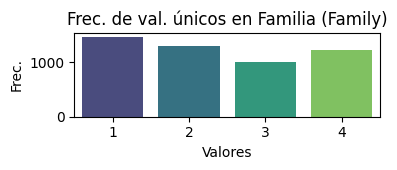

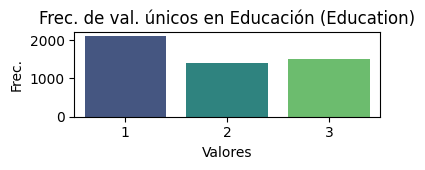

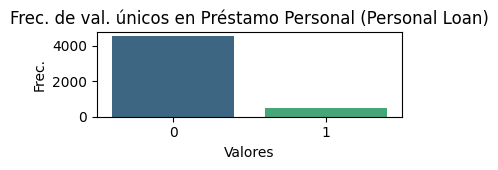

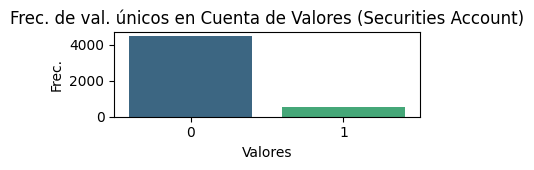

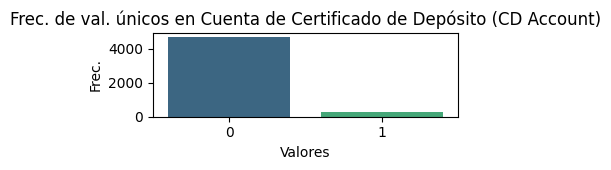

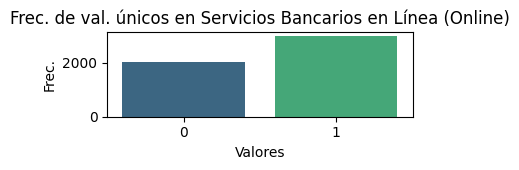

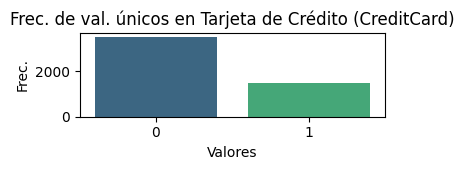

In [25]:
# Diccionario de traducción de columnas
column_translation = {
    'ID': 'ID',
    'Age': 'Edad',
    'Experience': 'Experiencia',
    'Income': 'Ingresos',
    'ZIP Code': 'Código Postal',
    'Family': 'Familia',
    'CCAvg': 'Gasto Medio en Tarjeta de Crédito',
    'Education': 'Educación',
    'Mortgage': 'Hipoteca',
    'Personal Loan': 'Préstamo Personal',
    'Securities Account': 'Cuenta de Valores',
    'CD Account': 'Cuenta de Certificado de Depósito',
    'Online': 'Servicios Bancarios en Línea',
    'CreditCard': 'Tarjeta de Crédito'
}

# Visualización de los valores únicos y sus frecuencias para cada columna categórica
for columna in indicadores_categoricos['Columna']:
    valores_unicos = df[columna].value_counts()

    # Gráfico de barras compacto
    plt.figure(figsize=(4, 1.8))
    sns.barplot(x=valores_unicos.index, y=valores_unicos.values, palette='viridis')
    plt.title(f'Frec. de val. únicos en {column_translation[columna]} ({columna})')
    plt.xlabel('Valores')
    plt.ylabel('Frec.')
    plt.xticks()  # Rotar etiquetas en el eje x si es necesario
    plt.tight_layout()  # Ajustar el layout para que todo quepa bien
    plt.show()

## Visualizando Datos No Categoricos

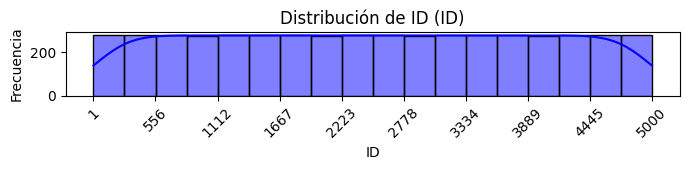

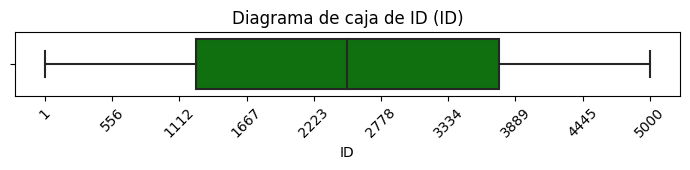

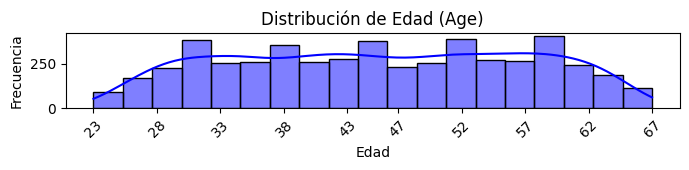

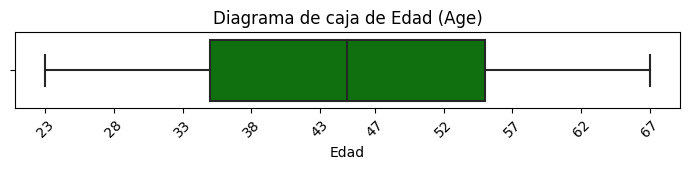

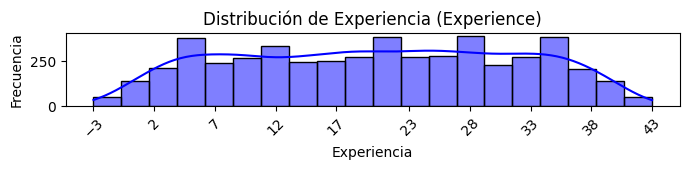

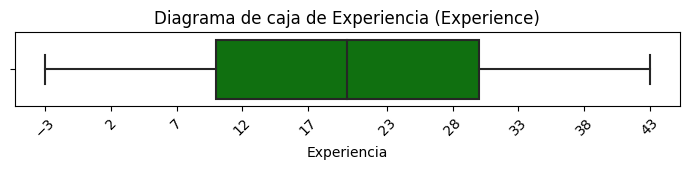

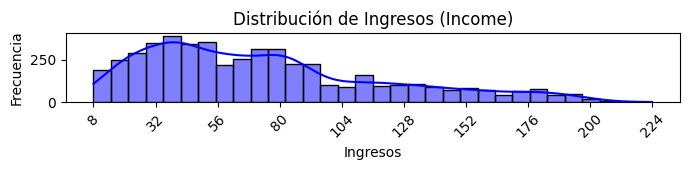

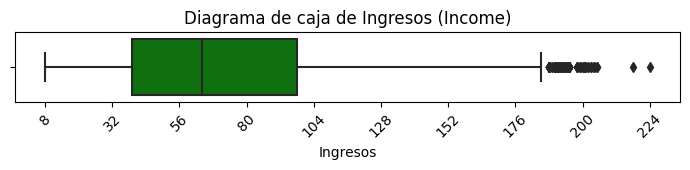

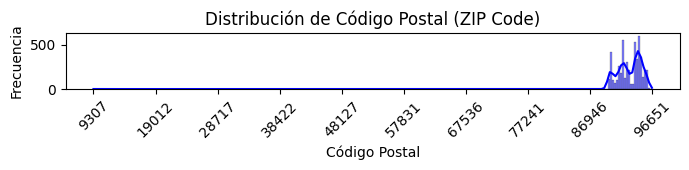

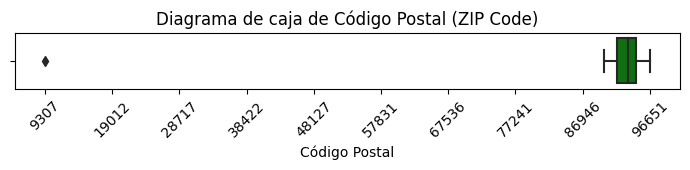

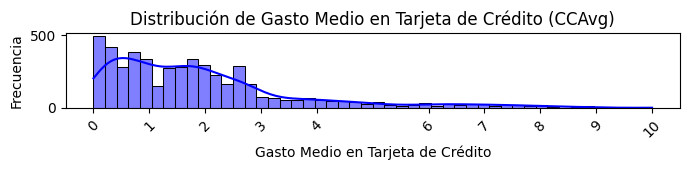

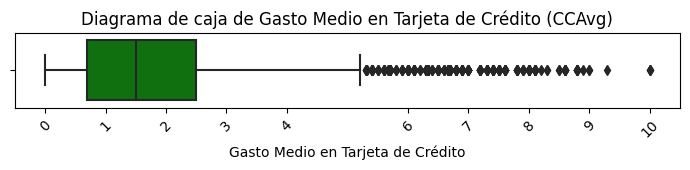

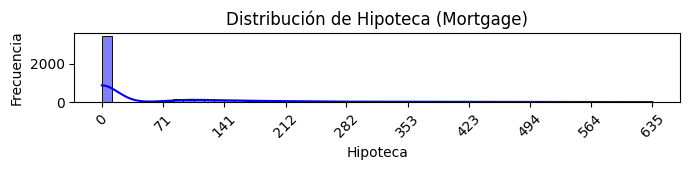

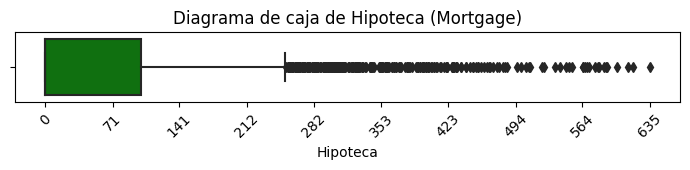

In [26]:
def generate_integer_ticks(min_value, max_value, num_ticks):
    """
    Genera ticks enteros equidistantes entre min_value y max_value.
    """
    ticks = np.linspace(min_value, max_value, num_ticks)
    ticks = np.round(ticks).astype(int)
    return np.unique(ticks)  # Asegurar que los ticks sean únicos

# Definir el número de ticks
num_ticks = 10

# Visualización de las columnas no categóricas
for columna in indicadores_no_categoricos['Columna']:
    # Histograma
    plt.figure(figsize=(7, 1.8))
    sns.histplot(df[columna], kde=True, color='blue')
    plt.title(f'Distribución de {column_translation[columna]} ({columna})')
    plt.xlabel(column_translation[columna])
    plt.ylabel('Frecuencia')

    # Definir más ticks en el eje x (enteros)
    x_ticks = generate_integer_ticks(int(df[columna].min()), int(df[columna].max()), num_ticks)
    plt.xticks(ticks=x_ticks, rotation=45)

    plt.tight_layout()  # Ajustar el layout para que todo quepa bien
    plt.show()

    # Diagrama de Caja (Boxplot)
    plt.figure(figsize=(7, 1.8))
    sns.boxplot(x=df[columna], color='green')
    plt.title(f'Diagrama de caja de {column_translation[columna]} ({columna})')
    plt.xlabel(column_translation[columna])

    # Definir más ticks en el eje x (enteros)
    x_ticks = generate_integer_ticks(int(df[columna].min()), int(df[columna].max()), num_ticks)
    plt.xticks(ticks=x_ticks, rotation=45)

    plt.tight_layout()  # Ajustar el layout para que todo quepa bien
    plt.show()

## Matriz de Correlacion

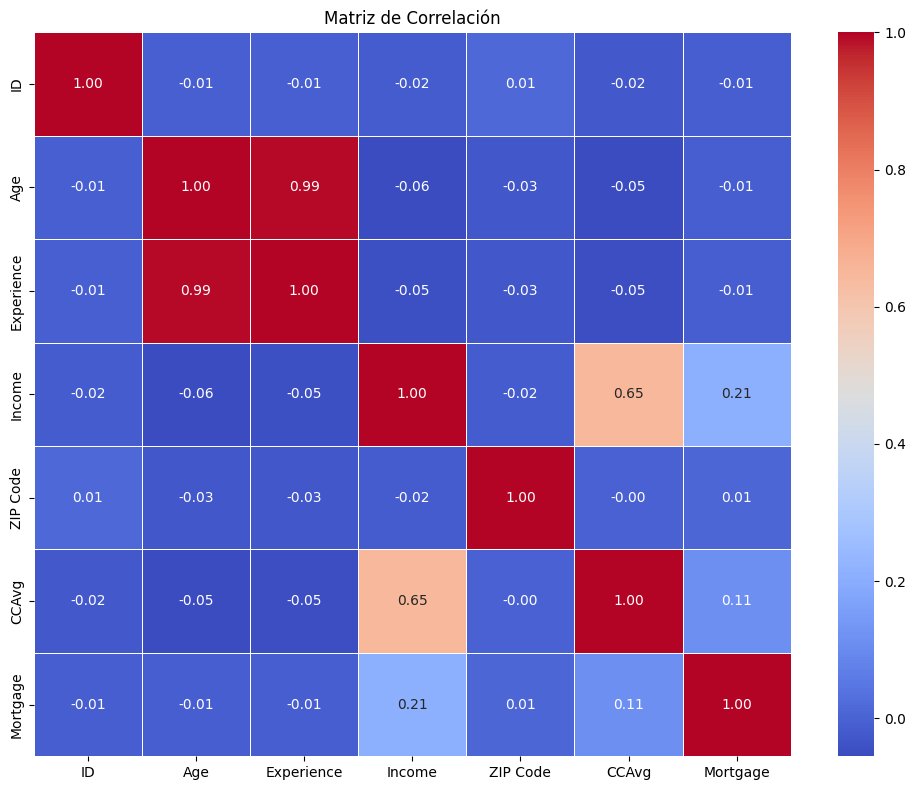

In [27]:
# Matriz de Correlación (Heatmap)
plt.figure(figsize=(10, 8))
correlation_matrix = df[columnas_no_categoricos].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlación')
plt.tight_layout()
plt.show()

In [28]:
# Crear un DataFrame con las características más correlacionadas
corr_pairs = correlation_matrix.abs().unstack().sort_values(kind="quicksort", ascending=False)
corr_pairs = corr_pairs[corr_pairs < 1].drop_duplicates().reset_index()
corr_pairs.columns = ['Feature 1', 'Feature 2', 'Correlation']

# Concatenar los nombres de las características en una sola columna
corr_pairs['Features'] = corr_pairs['Feature 1'].map(column_translation) + " y " + corr_pairs['Feature 2'].map(column_translation)

# Seleccionar solo las columnas 'Features' y 'Correlation'
corr_pairs = corr_pairs[['Features', 'Correlation']]

# Ajustar el ancho de la columna impresa
pd.set_option('display.max_colwidth', 100)

# Imprimir el DataFrame con las características más correlacionadas
print("\nCaracterísticas más correlacionadas entre sí en orden:")
corr_pairs.head(10)  # Mostrar las 10 correlaciones más altas


Características más correlacionadas entre sí en orden:


,Features,Correlation
0,Experiencia y Edad,0.994215
1,Gasto Medio en Tarjeta de Crédito y Ingresos,0.645984
2,Hipoteca y Ingresos,0.206806
3,Hipoteca y Gasto Medio en Tarjeta de Crédito,0.109905
4,Ingresos y Edad,0.055269
5,Gasto Medio en Tarjeta de Crédito y Edad,0.052012
6,Gasto Medio en Tarjeta de Crédito y Experiencia,0.050077
7,Ingresos y Experiencia,0.046574
8,Edad y Código Postal,0.029216
9,Experiencia y Código Postal,0.028626
